## Install packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import rasterio
import pandas as pd
from copy import deepcopy
import glob, os

## Chapter 2 Basic operations on images

In [2]:
img = cv2.imread("Ducati_side_shadow.png",1)


In [3]:
def windimg(image):
    cv2.namedWindow("window", cv2.WINDOW_NORMAL)
    cv2.imshow("window", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [4]:
windimg(img)

In [5]:
imgcol = deepcopy(img)
circle = cv2.circle(imgcol, (780, 1280),350,(125,50,39),20)
windimg(circle)

In [6]:
imgN = cv2.imread("Ducati_side_shadow.png",1)

In [7]:
windimg(imgN)

In [12]:
imgN = deepcopy(imgN)
def click2circle(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(imgN,(x,y),50,(255,0,0),4)
    
cv2.namedWindow("differences",cv2.WINDOW_NORMAL)
cv2.setMouseCallback("differences", click2circle)

In [ ]:

while True:
    cv2.imshow("differences", imgN)
    a = cv2.waitKey(1000)
    if a == 27:
        break
cv2.desrroyAllWindows()

In [ ]:
# splitting channels and map algebra

In [8]:
b,g,r = cv2.split(img)

In [9]:
windimg(r)

In [10]:
#band algebra
#subtraction
windimg(r-b)

In [11]:
#Addition
img2 = cv2.merge((b,g,r))

In [12]:
windimg(img2)

In [13]:
# Resizing images

In [14]:
imgres = cv2.resize(img, dsize = None, fx = 1, fy = 1, interpolation = cv2.INTER_CUBIC)

In [15]:
cv2.imshow("window", imgres)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [16]:
#cropped = img2[10:68,80:70]

In [17]:
#windimg(cropped)

## Geometric operations on images

In [18]:
# image gradient

In [19]:
crops = cv2.imread("crops.jpg",0)

In [20]:
windimg(crops)

In [21]:
#gradient detection using sobel function
sobelx = cv2.Sobel(crops, cv2.CV_8U, 1,0, ksize=3)

In [22]:
windimg(sobelx)

In [23]:
#gradient detection using laplacian function
laplacianx = cv2.Laplacian(crops, cv2.CV_8U)

In [24]:
windimg(laplacianx)

In [25]:
#edge and feature detection

In [26]:
#canny edge operator
edges = cv2.Canny(crops,150, 400) #the filter can be varied 
windimg(edges)

In [27]:
bbal = cv2.imread("bbal.jpg", 1)
windimg(bbal)

In [ ]:
#Radiometric operations on images

In [29]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
windimg(hsv)

In [30]:
# rgb to Gray
gry = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
windimg(gry)

In [31]:
# Binary image
r, t = cv2.threshold(gry,100,255, cv2.THRESH_BINARY)

In [32]:
windimg(t)

In [43]:
# image histogram
lena = cv2.imread("lena.jpg", 0)

In [44]:
windimg(lena)

In [45]:
hist = cv2.calcHist([lena], [0], None,[256], [0,256])

In [46]:
xaxis = np.arange(256).reshape(256,1)

In [47]:
histogram=np.hstack((xaxis, hist)).astype(int)

<function matplotlib.pyplot.show(close=None, block=None)>

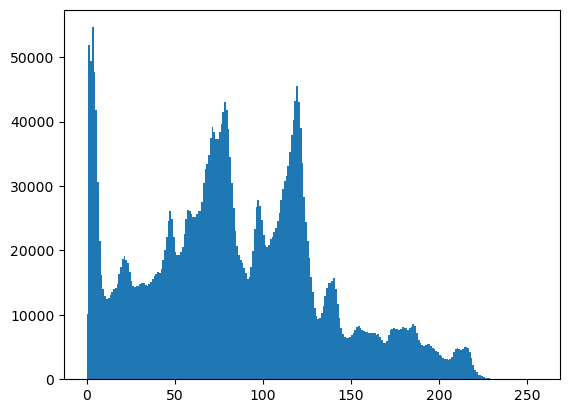

In [48]:
plt.hist(lena.flatten(), 256,[0,256])
plt.show

In [49]:
equ = cv2.equalizeHist(lena)

In [50]:
windimg(equ)

In [51]:
res = np.hstack((lena,equ))

In [52]:
windimg(res)

In [53]:
# Convolution based operation

In [54]:
blur = cv2.blur(lena,(7,7))

In [55]:
windimg(blur)

In [56]:
blurG = cv2.GaussianBlur(lena,(11,11),0)

In [57]:
windimg(blurG)

In [58]:
res = np.hstack((lena,blurG))

In [59]:
windimg(res)

In [60]:
# image classification

In [61]:
img = cv2.imread("Ducati_side_shadow.png", 1)
windimg(img)


In [62]:

imgcl = np.float32(img.reshape((-1,3)))
criteria= (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER, 15,1.0)
K=6
ret, lab, center = cv2.kmeans(imgcl, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

center = np.uint8(center)
res = center[lab.flatten()]

res2=res.reshape((img.shape))

windimg(res2)

In [63]:
# Chapter5 : An Earth Observation application
p = 'before'
a = 'after'
PathB = glob.glob(f'{p}/*.jp2')
PathA = glob.glob(f'{a}/*.jp2')

In [64]:
BEF = []
AFT = []
for i in PathB:
    BEF.append(cv2.imread(i,0))

for i in PathA:
    AFT.append(cv2.imread(i,0))

In [65]:
windimg(BEF[6])

In [66]:
BEF32 = []
AFT32 = []

for i in range(1,7):
    BEF32.append(np.float32(cv2.equalizeHist(BEF[i])))

for i in range(1,7):
    AFT32.append(np.float32(cv2.equalizeHist(AFT[i])))

In [67]:
windimg(cv2.equalizeHist(BEF[3]))
windimg(cv2.equalizeHist(AFT[3]))

In [68]:
before = cv2.merge((BEF32[0],BEF32[1],BEF32[2],BEF32[3],BEF32[4],BEF32[5]))

In [69]:
beforeReady=before.reshape((-1,6))
criteria = (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER, 30, 1)
ret, label, center = cv2.kmeans(beforeReady, 6, None,criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
center = np.uint8(center)
res=center[label.flatten()]
res2=res.reshape((before.shape))

In [70]:
beforeF = deepcopy(res2[:][:,:,:3])

In [ ]:
windimg(beforeF)

In [ ]:
after = cv2.merge((AFT32[0],AFT32[1],AFT32[2],AFT32[3],AFT32[4],AFT32[5]))

In [ ]:
afterReady=after.reshape((-1,6))
criteria = (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER, 30, 1)
ret, label, center = cv2.kmeans(afterReady, 6, None,criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
center = np.uint8(center)
res=center[label.flatten()]
res2=res.reshape((before.shape))

In [ ]:
afterF = deepcopy(res2[:][:,:,:3])

In [ ]:
windimg(afterF)